### Balancer Window Research

In [1]:
import sys
from pathlib import Path
sys.path.append('./libs/')
sys.path.append('./datas/')

from Balancer_lib_new import *
from Datas_4_040122 import *
from Strategy import *

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import copy
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

Import Datas for Strategies finished.


In [2]:
#print(len(datas))

## Initial parametrs for the pool

In [3]:
n=4# the number of Tokens in Pool - do not change this parametr
# you may change parametrs below
fee=0.003#fee
amount=1000000#amount of each token in pool
step=0#start step for init pool
ratio=[0.25]*n #start ratio of Token's Value in the pool
#pool = pool_from_ratio_value(ratio, datas, step, amount*4, n)#Init Pool
prices= [402.42, 11.208, 10.655, 37988.13]#market prices for init pool
pool = []#init pool
for i in range(0,n):
    pool.append(amount/prices[i])
weights=[0.25]*n#Init weights
ratio1=[0.7, 0.1, 0.1,0.1]# new ratio
n_steps=30#number of steps for making changes
start_step=1000
acc=0.01 #accuracy of the achieved new ratio
print('start pool = ',pool)

start pool =  [2484.9659559664033, 89221.98429693076, 93852.65133740028, 26.324012263830834]


# On start Moment change the weights so the spot prices equal market prices

In [4]:
weights_new = weights_from_new_pool(pool, datas, step, n)
print('weights_new = ', weights_new)
#check еру accuracy of selection of the weights on the price's difference
value0 = value(pool, datas, step, n)
dd = delta_spot_market_procent(pool, weights_new, datas, step, n, value0)
print('price difference in percents = ', dd)

weights_new =  [0.2134119472101015, 0.2591850699768814, 0.18659424648195708, 0.34080873633105996]
price difference in percents =  [0.0, -1.9371394104691935e-16, 0.0, 0.0]


## Computing new pool for new ratio

In [5]:
print('current pool = ', pool)
pool_new = pool_from_ratio_oldpool(pool, ratio1, datas, step,  n)
print('new desired pool = ', pool_new)


current pool =  [2484.9659559664033, 89221.98429693076, 93852.65133740028, 26.324012263830834]
new desired pool =  [8150.79095578463, 34424.044681620406, 50297.71984232937, 7.723983999711737]


## Computing new weights for new pool ( for new ratio)

In [6]:
weights_new = weights_from_new_pool(pool_new, datas, step, n)
print('weights_new = ', weights_new)

weights_new =  [0.7, 0.1, 0.1, 0.1]


## Computing the Impermanent Loss and Real ratio after swaps for Strategy 1

In [7]:
def strategy1_1_step(pool1, ratio1, datas, n, step):
    #st=[]

    arr_pool1=[]
    arr_value_pool1=[]
    arr_value_tokens1=[]
    arr_IL1=[]
    #w1=[]
    arr_ratio1=[]

    #Strategy1 - datas
    #for step in range(0, len(datas)):
        #st.append(step)
        #datas.append(datas[step])
    pool11 = pool_from_ratio_oldpool(pool1, ratio1, datas, step,  n)
    weights11 = weights_from_new_pool(pool11, datas, step, n)
        #w1.append(weights11)
    
    value01=value(pool1, datas, step, n)#before swap
    sw1 = swaps_new1(pool1, weights11, datas, step, n, value01, fee)
    pool11 =sw1[0]
        #arr_pool1.append(pool11)
        #v1=value_tokens(pool11, datas, step, n)
        #arr_value_tokens1.append(v1)
    rt11=ratio_tokens(pool11, datas, step, n)
        #arr_ratio1.append(rt11)
    value1=value(pool11, datas, step, n)#after swap
    
        #arr_value_pool1.append(value1)
    IL1=(value1-value01)/value01
    #arr_IL1.append(IL1)
    return IL1, rt11, pool11, weights11

In [8]:
str1 = strategy1_1_step(pool, ratio1, datas, n, step)# return arr_IL1, arr_ratio1, pool11, weights11

In [9]:
#check the results of Strategy 1
#print(pool)
print('new desired pool = ', pool_new)
print('new real pool = ', str1[2])
print('new real weights = ', str1[3])
print('new real ratio = ', str1[1])
print('IL = ', str1[0])

new desired pool =  [8150.79095578463, 34424.044681620406, 50297.71984232937, 7.723983999711737]
new real pool =  [4661.108588042343, 20496.92585279524, 29787.949659966773, 4.484026017159872]
new real weights =  [0.7, 0.1, 0.1, 0.1]
new real ratio =  [0.6936187082976619, 0.1031715905558751, 0.10261848681062054, 0.1005912143358424]
IL =  -0.4228792261035937


## Computing the Impermanent Loss and Real ratio after swaps for Strategy 2¶

In [10]:
def strategy2_1_step(pool2, weights2, ratio1, datas, step, n, fee, start_step, n_steps):
    pool2_end = pool_from_ratio_oldpool(pool2, ratio1, datas, start_step,  n)
    weights_end = weights_from_new_pool(pool2_end, datas, start_step, n)
    dif_weights = [0]*n
    for i in range(0,n):
        dif_weights[i] = (weights_end[i] - weights2[i])/(n_steps)
        
    st2=[]
    arr_pool2=[]
    arr_value_tokens2=[]
    arr_value_pool2=[]
    arr_IL2=[]
    w2=[]
    arr_ratio2=[]
    arr_tot_IL2=[]
    IL2_tot=0
    for step in range(start_step, start_step+n_steps):
        st2.append(step)
        value02=value(pool2, datas, step, n)#before swap
        for i in range(0, n):
            weights2[i]+=dif_weights[i]
         
        
        
        sw2 = swaps_new1(pool2, weights2, datas, step, n, value02, fee)
        pool2 =sw2[0]
    
        w2.append(weights2)
        arr_pool2.append(pool2)
        v2=value_tokens(pool2, datas, step, n)
        arr_value_tokens2.append(v2)
        rt2=ratio_tokens(pool2, datas, step, n)
        arr_ratio2.append(rt2)
        value2=value(pool2, datas, step, n)#after swap
    
        arr_value_pool2.append(value2)
        IL2=(value2-value02)/value02
        arr_IL2.append(IL2)
        IL2_tot+=IL2
        arr_tot_IL2.append(IL2_tot)
        #if 
        
    return arr_tot_IL2, arr_ratio2, pool2, w2

In [11]:
#start_step = 0# delete
print(pool)
str2 = strategy2_1_step(pool, weights, ratio1, datas, step, n, fee, start_step, n_steps)

[2484.9659559664033, 89221.98429693076, 93852.65133740028, 26.324012263830834]


In [12]:
#check the results of Strategy 2
#print(pool)
print('new desired pool = ', pool_new)
print('new real pool = ', str2[2])
print('new real weights = ', str2[3][-1])
print('new real ratio = ', str2[1][0])
print('IL Strategy2= ', str2[0][-1])

new desired pool =  [8150.79095578463, 34424.044681620406, 50297.71984232937, 7.723983999711737]
new real pool =  [7854.515891605297, 35370.373879947285, 43530.14710922661, 7.839037240584812]
new real weights =  [0.7000000000000004, 0.09999999999999987, 0.09999999999999987, 0.09999999999999987]
new real ratio =  [0.26551772336019736, 0.24362739471533573, 0.24564204753257765, 0.24521283439188918]
IL Strategy2=  -0.034928723090770386


## Computing the Impermanent Loss and Real ratio after swaps for Strategy 3¶

In [13]:
def strategy3(pool3, weights3, ratio1, datas, step, n, fee, start_step, n_steps, vel):
    pool3_end = pool_from_ratio_oldpool(pool3, ratio1, datas, start_step,  n)
    weights_end = weights_from_new_pool(pool3_end, datas, start_step, n)
    dif_weights = [0]*n
    #print('weights old, new = ',weights3,weights_end )
    for i in range(0,n):
        dif_weights[i] = (weights_end[i] - weights3[i])/(vel)
    #print('dif_weights= ', dif_weights)
        
    st3=[]
    arr_pool3=[]
    arr_value_tokens3=[]
    arr_value_pool3=[]
    arr_IL3=[]
    w3=[]
    arr_ratio3=[]
    arr_tot_IL3=[]
    IL3_tot=0
#print(pool3)
    for step in range(start_step, start_step+n_steps):
        #counter=0
        st3.append(step)
        value03=value(pool3, datas, step, n)#before swap
        
        
        delta_price = delta_spot_market_procent(pool3, weights3, datas, step, n, value03)
    
        
        current_ratio = ratio_tokens(pool3, datas, step, n)
        r1=descr_ratio(ratio1)[0]
        pr1=descr_ratio(ratio1)[1]
        cr=descr_ratio(current_ratio)[0]
        pcr=descr_ratio(current_ratio)[1]
        print(step,r1[0],cr[0], r1[n-1],cr[n-1])
        
        if r1[0]>cr[0] and  r1[n-1]<cr[n-1] :
            print('Меняем веса')
            for i in range(0, n):
                    weights3[i]+=dif_weights[i]
                    
            if delta_price[pr1[0]]>0  and delta_price[pr1[n-1]]<0:
                print('Торгуем')
                
                #pool3_end = pool_from_ratio_oldpool(pool3, ratio1, datas, step,  n)
                #w3=weights_from_new_pool(pool3_end, datas, step, n)
                #for i in range(0, n):
                #    weights3[i]+=dif_weights[i]
                sw3 = swaps_new1(pool3, weights3, datas, step, n, value03, fee)
                #print('результат торгов = ',sw3)
                pool3 =sw3[0] 
        else:
            print('stop !!!')
            break
        sw3 = swaps_new1(pool3, weights3, datas, step, n, value03, fee)
        pool3 =sw3[0]
        w3.append(weights3)

        arr_pool3.append(pool3)
        v3=value_tokens(pool3, datas, step, n)
        arr_value_tokens3.append(v3)
        rt3=ratio_tokens(pool3, datas, step, n)
        arr_ratio3.append(rt3)

        value3=value(pool3, datas, step, n)#after swap

        arr_value_pool3.append(value3)
        IL3=(value3-value03)/value03
        arr_IL3.append(IL3)
        IL3_tot+=IL3
        arr_tot_IL3.append(IL3_tot)
    
    return arr_tot_IL3, arr_ratio3, pool3, w3

In [14]:
vel=n_steps
weights=[0.25]*n
print(pool, weights)
str3 = strategy3(pool, weights, ratio1, datas, step, n, fee, start_step, 20*n_steps, vel)

[2484.9659559664033, 89221.98429693076, 93852.65133740028, 26.324012263830834] [0.25, 0.25, 0.25, 0.25]
1000 0.7 0.33164291464388734 0.1 0.21228514499752074
Меняем веса
Торгуем
1001 0.7 0.2649486888012897 0.1 0.24338432990611022
Меняем веса
Торгуем
1002 0.7 0.2790208048629312 0.1 0.239496639631146
Меняем веса
Торгуем
1003 0.7 0.29611441289615925 0.1 0.23429635122508136
Меняем веса
1004 0.7 0.3078833432831265 0.1 0.23017126241344374
Меняем веса
Торгуем
1005 0.7 0.32345332285384404 0.1 0.22376850524672043
Меняем веса
1006 0.7 0.34003174557321375 0.1 0.21907978241738163
Меняем веса
1007 0.7 0.3538283283008517 0.1 0.215036576168512
Меняем веса
Торгуем
1008 0.7 0.3686712044667381 0.1 0.2086891149697369
Меняем веса
1009 0.7 0.3836915842081442 0.1 0.20472434495883066
Меняем веса
1010 0.7 0.39935435915760964 0.1 0.19970943035120475
Меняем веса
Торгуем
1011 0.7 0.4112662003416304 0.1 0.19604813404346266
Меняем веса
Торгуем
1012 0.7 0.42737675350196175 0.1 0.19020224234042818
Меняем веса
Торгуем

In [15]:
#check the results of Strategy 3
#print(pool)
print('new desired pool = ', pool_new)
print('new real pool = ', str3[2])
print('new real weights = ', str3[3][-1])
print('new real ratio = ', str3[1][-1])
print('IL Strategy3= ', str3[0][-1])

new desired pool =  [8150.79095578463, 34424.044681620406, 50297.71984232937, 7.723983999711737]
new real pool =  [7854.515891605297, 35370.373879947285, 43530.14710922661, 7.839037240584812]
new real weights =  [0.7000000000000004, 0.09999999999999987, 0.09999999999999987, 0.09999999999999987]
new real ratio =  [0.6971063741742799, 0.09964216185788394, 0.10201567673779126, 0.101235787230045]
IL Strategy3=  -0.034928723090770386


In [16]:
print('IL for Strategy 1,2,3 = ',str1[0],' ', str2[0][-1],' ', str3[0][-1] )

IL for Strategy 1,2,3 =  -0.4228792261035937   -0.034928723090770386   -0.034928723090770386


## Market Prices. Period - 2 days 1 minute timeframe

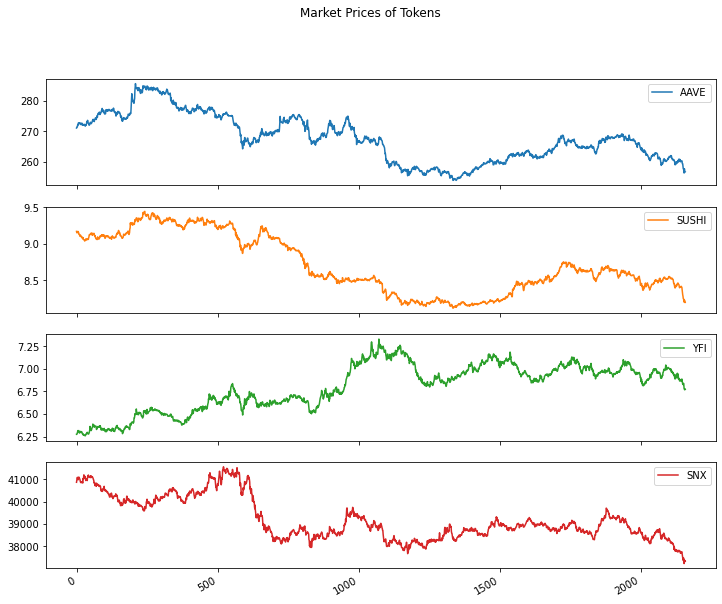

In [17]:
price=[]
for i in range(0,len(datas)):
    price.append(datas[i][0:4])
df=pd.DataFrame(price, columns=['AAVE', 'SUSHI', 'YFI', 'SNX'])
axs = df.plot(figsize=(12, 10), subplots=True, title='Market Prices of Tokens')

In [18]:
#df=pd.DataFrame(str1, columns=['AAVE', 'SUSHI', 'YFI', 'SNX'])
#axs = df.plot(figsize=(12, 10), subplots=True, title='Market Prices of Tokens')
print(str1)

(-0.4228792261035937, [0.6936187082976619, 0.1031715905558751, 0.10261848681062054, 0.1005912143358424], [4661.108588042343, 20496.92585279524, 29787.949659966773, 4.484026017159872], [0.7, 0.1, 0.1, 0.1])


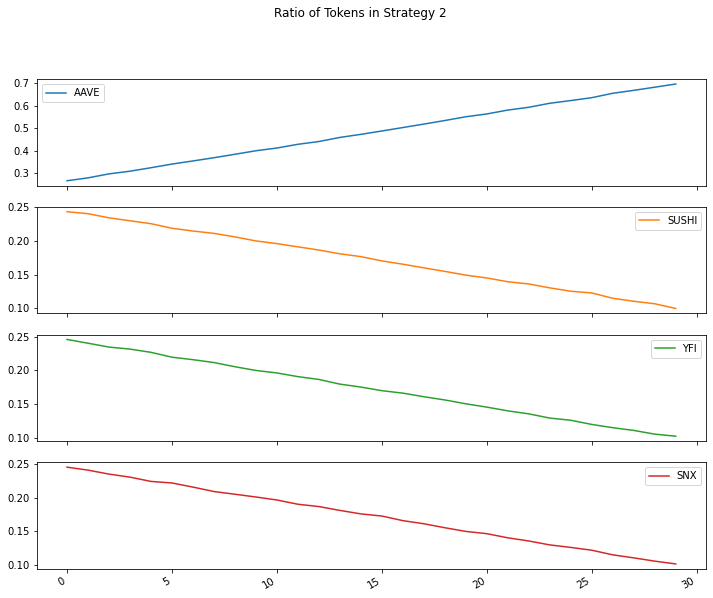

In [19]:
df=pd.DataFrame(str2[1], columns=['AAVE', 'SUSHI', 'YFI', 'SNX'])
axs = df.plot(figsize=(12, 10), subplots=True, title='Ratio of Tokens in Strategy 2')
#print(str2[1])

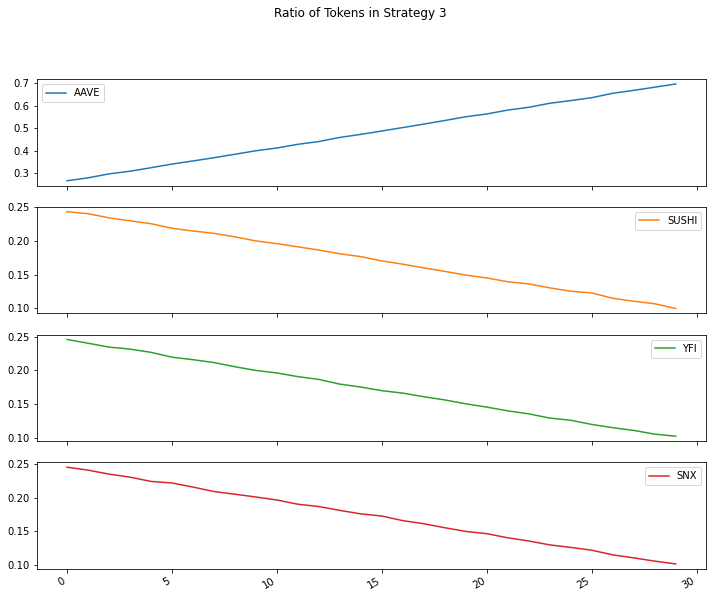

In [20]:
df=pd.DataFrame(str3[1], columns=['AAVE', 'SUSHI', 'YFI', 'SNX'])
axs = df.plot(figsize=(12, 10), subplots=True, title='Ratio of Tokens in Strategy 3')